$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\glm}[1]{\overline{#1}^L}$
$\newcommand{\psmom}[0]{\boldsymbol{\textsf{p}}}$
$\newcommand{\di}[0]{\textrm{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\mde}[1]{\frac{\textrm{D} {#1}}{\textrm{D} t}}$
$\newcommand{\mdel}[1]{\textrm{D}_t {#1}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\mathrm i}$
$\newcommand{\unit}[1]{\boldsymbol{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$
$\newcommand{\Fma}[0]{\vec F=m\vec a}$

In [1]:
from IPython.display import YouTubeVideo  # , Image, display
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import interactive
# interactive(False)
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100  # for crisper figures later

*Readings:* 

* *Keep working on the computational physics website (see Syllabus); Not really in textbooks, but the Wikipedia entry for complex numbers is good: https://en.wikipedia.org/wiki/Complex_number*.
* *Some of the ideas covered here are scattered across French, chapters 1 and 2.*
* *For the phase space representation (time permitting): Gollub & Baker 2.1,*

# Expectations

## Remember

* What a forward finite difference is.
* Basic definitions related to complex numbers: magnitude, complex conjugate, polar form...
* What a periodic signal is, the definitions of the period, frequency, angular frequency, amplitude and phase.
* What the beat (angular) frequency is, and what the envelope of the signal means in this case.
* There are many equivalent ways ways to describe an oscillation ($A\cos(\omega t +\phi)$, $B\sin(\omega t + \psi)$, $C\cos(\omega t)+D\sin(\omega t)$, $\text{Re}(E\eexp{i\omega t})$, $F\eexp{i\omega t} + G\eexp{i\omega t}$). See tutorial problem for a thorough demonstration.

## Understand

* The equivalence of all oscillatory motions.
* How Taylor expansions can discretise dynamics, paving the way for numerical integrations.

## Apply

* Perform basic operations on complex numbers such as multiplication and division, conversion between polar and Cartesian notations.
* Set up a basic numerical integration.
* Represent complex numbers graphically.
* Switch between equivalent forms of the representations of oscillations mentioned under "Remember".
* ... and make sure you can do worked examples, tutorials and problem sets.

# Introduction

Last time, we saw a few problems that were simple enough to be solved analytically (i.e., with pen a paper, with nice, clean formulas for the solutions).
Analytical solutions are great: with a bit of practice, a physicist is usually able to mentally visualize the solution and analyze their behaviour in broad strokes by just looking at the formulas, without even plotting them.
In turn, plotting them is easy and requires a minimal amount of computing resources.
But in the shadow of these bright spots lies... everything else.
Seeing these few simple cases got us to look at a glimpse of how hard it would be to solve for the smallest complication in the mathematical set-up of these cases.

In this lecture, we touch upon two tools that prove invaluable when studying mechanics problems and beyond: when analytical solutions are hopeless, we will introduce how to integrate $\Fma$ numerically. We will also see and a curated version of how to use complex numbers and complex exponentials, which make solving problems analytically so much more simple, with a bit of practice anyway.

# Solving $\Fma$ problems numerically: the intro to the intro

## General Principle

As we said earlier, the general system
$$a=\ddot x=\frac{F(x,v,t)}m$$
does not have a general solution, and often a solution can't be written down.
But we can always try to solve this equation numerically, using approximation methods.
We can write an approximation for the velocity, given the acceleration:
$$a=\ode{v}{t}=\lim_{\Delta t\to 0}\frac{v(t+\Delta t)- v(t)}{\Delta t},$$
which implies that
\begin{equation}
    v(t+\Delta t)\approx v(t)+\Delta t\, a(t).
    \label{eq:vapproxDt}
\end{equation}

If you don't like the $\approx$ sign, here is a more mathematical way to think of it.
If $\Delta t$ is small, then we can write a Taylor expansion of $v(t+\Delta t)$ and get:
$$v(t+\Delta t) = v(t) + \frac{dv}{dt}\Delta t + h.o.t.,$$
where $h.o.t.$ stands for higher-order terms.

The forms are identical, but writing it in terms of a Taylor expansion tells you something more.
The next term in the Taylor expansion is proportional to $(\Delta t)^2$.
This means you know how bad of an error you are making in the approximation of equation \eqref{eq:vapproxDt}.  The error is of order $(\Delta t)^2$. 
You can write this explicitly with the notation
$$v(t+\Delta t) = v(t) + \ode{v}{t}\Delta t + O[(\Delta t)^2].$$

***

**Terminology clarification**, won't have time to talk about in class:
$$\frac{v(t+\Delta t)- v(t)}{\Delta t}$$
is called the *forward finite difference approximation* to $\odel{v}t$. It is forward because we chose to go forward in time, while 
$$\frac{v(t)- v(t-\Delta t)}{\Delta t}$$
would be called the *backward finite difference approximation* and
$$\frac{v(t+\Delta t)- v(t-\Delta t)}{2\Delta t}$$
would be called the *centred finite difference approximation*. Note the wider interval: you could show, using Taylor's expansions again, that while the backward and forward finite differences are accurate up to order $(\Delta t)^2$, the last one I wrote is accurate up to order $(\Delta t)^3$. It means that with the same number of points on the interval (same computational cost), you get a more accurate solution.
Conversely, to reach the same level of accuracy, you could employ longer and less numerous intervals (cheaper computationally).

There are plenty of more accurate schemes, each of which comes with its set of advantages and drawbacks/compromises. We might see a few in this course, and some of you might see a lot more in PHY407 (Computational Physics).

***

Now, for $F=ma$ problems we know that
$$\ode{v}{t} = a = \frac Fm,$$
so we can write
$$v(t+\Delta t)\approx v(t)+\Delta t\, a(t)=v(t)+\Delta t\frac {F(t,x(t),v(t))}m$$
and
$$x(t+\Delta t)\approx x(t)+\Delta t\, v(t).$$
We can write this in terms of a recursion rule: Start at time $t_0$ and take steps of $\Delta t$ forward in time.
Label each new step $t_i$ where $i$ goes from $1\dots N$ (where $N$ is how many steps you take).
For each step, we need to calculate $v$ and $x$ at the new timestep from their values at the old time step. So, $\forall i\ge 1$,
\begin{eqnarray*}
v_{i+1} & = & v_i + \Delta t\, F(t_i,x_i,v_i)/m\\
x_{i+1} & = & x_i + \Delta t\, v_{i+1}
\end{eqnarray*}
Note how we use the *updated* $v_{i+1}$ to update $x$. Just using the old version of $v_i$ would be called the forward Euler method and is usually very unstable.
Integrating numerically this way is known as the "Euler-Cromer" method and is a lot more stable.

We can use these recursion formulas to solve $F=ma$ on a computer by looping over the index $i$.
An example with $F=F(x)$ follows.

## Example: mass and spring system

### Set-up and analytical solution

I will go quickly over it here, but will go back to this basic example with proper explanations soon.

A mass $m$ (known) attached to an ideal horizontal spring (massless, frictionless, perfectly linear) experiences a force given by Hooke's law,
\begin{equation}
    F_H = -kx, \label{eq:Hooke}
\end{equation}
with $k$ (known) is the spring stiffness and $x$ the horizontal deviation with respect to the rest position (spring neither stretched nor compressed). The initial position at time $t_0=0$ is $x_0 = A$, and the initial velocity is $v_0 = 0$.

$F=ma$ here reads $F_H = -kx = m\ddot x$, and dividing by $m$, we get that
\begin{equation}
\ddot x + \omega^2 x = 0,\with \omega^2 = k/m.
\label{eq:ddot:x}
\end{equation}
The solution is of the form
\begin{equation}
x = a\cos(\omega t) + b\sin(\omega t),
\label{eq:x_sol}
\end{equation}
with
\begin{equation}v = \dot x = -a\omega\sin(\omega t) + b\omega\cos(\omega t).
\label{eq:v_sol}
\end{equation}

***
*Note: How are you supposed to know it's the combination of $\sin$ and $\cos$? Two options:*

1. *If you know ODEs, you know... Or you are glad I refreshed your memory, both work.*
2. *If you don't, think of the position of a mass on a spring (or play with the little simulation below): it goes back-and-forth periodically; when it turns around, it seems to slow down; and when it crosses the equilibrium position ($x=0$), it is when it goes the fastest. Looks like a sign or a cosine, or both, no? Stay agnostic for now and assume you don't know which frequency your sines and cosines should have, so, your guesses are $\sin(Ct)$ and $\cos(Ct)$, with $C$ unknown. Take two time derivatives of each guess, plug them into the ODE \eqref{eq:ddot:x}, and you will see that these functions are both solutions if and only if $C = \pm\omega$. Then, when you finally see ODEs in class, you will learn that they are the only solutions, with the coefficients $a$ and $b$ being determined later, with the initial conditions.*

In [19]:
%%html
<iframe src="https://phet.colorado.edu/sims/html/masses-and-springs/latest/masses-and-springs_en.html"
        width="800" height="600" allowfullscreen> </iframe>

***

Back to our problem. Plugging in $x_0 = A$ in eq. \eqref{eq:x_sol}, we get $a=A$, and plugging in $v_0=0$ in eq. \eqref{eq:v_sol}, we get $b=0$.
The analytical solution is then
$$x=A\cos(\omega t)\andeq v = -A\omega\sin(\omega t).$$

### Numerical implementation

In [58]:
omega, A = 0.1, 2.  # for illustration
nTimeSteps = 1000  # number of time steps
duration = 5*2*np.pi/omega  # integrating for five periods
t = np.linspace(0., duration, nTimeSteps+1)  # when there are 10 steps, there are 11 instants
def Fnorm(position): 
    """ We define the force as a function for a change;
    'norm' stands for 'normalized', i.e., divided by m """
    return -omega**2 * position # insert expression here

# Computations from analytical solutions
v_analytical = -A*omega*np.sin(omega*t)
x_analytical = A*np.cos(omega*t)

In [59]:
# we intialize numpy arrays, filled with zeros, same dimension as t
# will fill up timestep-by-timestep
v_numerical = 0*t
x_numerical = 0*t
Dt = t[1] - t[0]  # time step

# initial conditions
v_numerical[0] = 0.
x_numerical[0] = A

for i in range(1, len(t)):
    v_numerical[i] = v_numerical[i-1] + Fnorm(x_numerical[i-1])*Dt
    x_numerical[i] = x_numerical[i-1] + v_numerical[i]*Dt
    # Test Euler vs. Euler-Cromer

In [56]:
def plot_compare_numerical():
    ax1 = plt.subplot(211)  # 2 lines, 1 column, 1st box
    ax1.plot(t*omega/(2*np.pi), v_analytical/(A*omega),
         label="analytical")
    ax1.plot(t*omega/(2*np.pi), v_numerical/(A*omega),
         '--', label="numerical")
    ax1.set_ylabel("$v/(A\omega)$")
    ax1.grid()
    plt.legend()

    ax2 = plt.subplot(212, sharex=ax1)  # 2 lines, 1 column, 2nd box
    ax2.plot(t*omega/(2*np.pi), x_analytical/A,
            label="analytical")
    ax2.plot(t*omega/(2*np.pi), x_numerical/A,
             '--', label="numerical")
    ax2.set_xlabel("$t\omega/(2\pi)$")
    ax2.set_ylabel("$x/A$")
    ax2.grid()

    plt.tight_layout()
    plt.show()

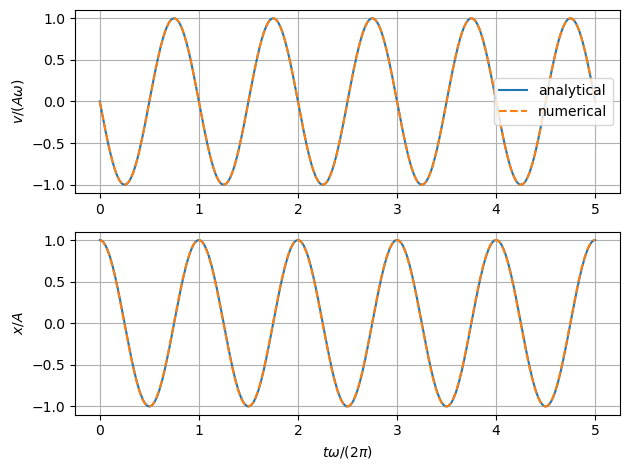

In [60]:
plot_compare_numerical()

Comments:
* reduce the number of time steps: the numerical solution diverges more and more: A small $\Delta t$ is crucial for accuracy, but takes more computational resources
* Trying Euler vs. Euler-Cromer leads to a disaster
* We were able to compare with analytical because there is a solution. Not always the case, but had the force been more complicated, the code would have remained as simple, except for the `Fnorm` function.

# Kinematics of oscillations and complex numbers

In this course, the vast majority of our phenomena involve oscillations.
Let's review what you already know and introduce complex numbers to describe them.

## Basic facts about linear oscillations

### Periodic signals

An oscillation is a motion that is periodic in time.
Imagine some variable $f(t)$ describing the motion.
It is an oscillation if there is some period $T$ that satisfies
$$\forall t,\quad f(t)=f(t+T)=f(t+2T)=\dots.$$

Oscillations are ubiquitous. They can be very simple (like a sine function), or much more complicated (think of any complicated pattern that repeats itself every well-defined period $T$).

We will begin our study of oscillations by working with sine and cosine functions.  Although these are "simple" oscillations, it turns out that they are the basis for the study of all oscillations because of Fourier's theorem.

> Fourier's theorem: Any period function that is piecewise continuous can be represented as a sum of sinusoidal functions with appropriate amplitudes and frequencies.

Said mathematically, if a function $f(t)$ of the real variable $t$ is continuous and periodic, with period $T$, then $\exists \{\alpha_n, \beta_n\}_{n\in \{1, 2,\dots \infty\}}$ such that 
\begin{equation}
    f(t) = \frac{\alpha_0}2 + \sum_{n=1}^\infty \left[\alpha_n \cos(\omega_n t) + \beta_n \sin(\omega_n t)\right] \with \omega_n = \frac{2\pi n}T.
    \label{eq:Fourier}
\end{equation}

Proving this is best fit for a Calculus course.
The message I want to convey is simply that studying one sine or one cosine isn't silly: they can be viewed as building blocks for more complex oscillating phenomena.
So, for now, simply keep in mind that any oscillation can be considered a linear combination of sines and cosines. If you want to go a bit deeper in a time-effective manner (25 mins may sound long but Grant Sanderson makes time fly), I recommend watching the video below (https://youtu.be/r6sGWTCMz2k), but this is off-topic for now.

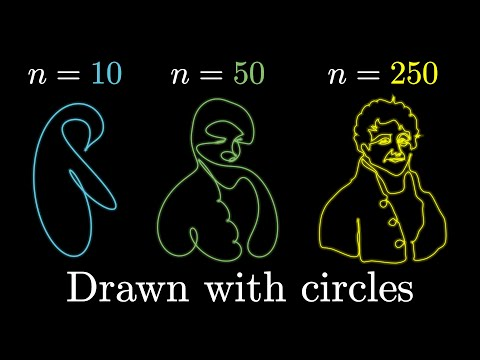

In [7]:
YouTubeVideo('r6sGWTCMz2k')

There is also this PhET simulation (still off-topic! I won't even mention it in class):

In [39]:
%%html
<iframe src="https://phet.colorado.edu/sims/html/fourier-making-waves/latest/fourier-making-waves_en.html"
        width="800" height="600" allowfullscreen></iframe>

***

**Intermission: linear or non-linear?**

There is a significant weakness in this reasoning, and again, to fully solve it would take an advanced undergraduate or graduate-level course: if we add up a bunch of sines and cosines, what guarantee do we have that we can study them one-by-one? Why is the sum of their contributions only that, the sum of their contributions? Couldn't they interact and lead to something else entirely?

In fact, they almost always could.
It is related to the linearity hypothesis mentioned in the video above, or lack thereof.
Any system for which a state of rest can be defined will respond linearly ("proportionally") to weak disturbances or forces.
Later in this course, we will provide a first exposure to what non-linear phenomena may look like, but most of the undergraduate curriculum of a physicist is about linear phenomena.
There is a good reason for that: even for extremely non-linear phenomena such as turbulence in fluids or the weather, to take examples close to my own area of specialization, one cannot make any headway without knowing the related linear phenomena like the back of their hand.
In the case of the weather and the ocean, we are talking about e.g., geostrophic currents or all sorts of linear waves that the equations of geophysical fluid dynamics support, and more (big fancy words, I know; the key point is that they are linear, meaning that once you know the context, you can treat them like any silly wave-on-a-string kind of physics that we will see in this course; and every sub-fields of physics will have their own big fancy words, but the same will happen).
Besides, linear phenomena tend to be universal: if you know the linear dynamics of waves on a string, translating them into the dynamics of EM waves in a cavity, quantum particles trapped in a well, or internal tides ducting between the top and bottom of the ocean is relatively straightforward, mathematically speaking.
When it comes to non-linear phenomena on the other hand, each sub-discipline of physics is in its own private hell.

Described crudely, linear dynamics is the dynamics of "gentle" phenomena.
Take Hooke's law (eqn. \ref{eq:Hooke}): it is linear, as in, there is a well-identified state of rest at $x=0$ and if you double the extension $x$, you will double the force $F_H$, because $k$ is constant.
But this is only valid over a certain extent, and I could come up with a bunch of different non-linear phenomena that would make $k$ vary:

* if we stretched our spring too much, it might deform permanently, which would change $k$, ($k(x)$) 
* if we stretched it even more, it could break ($k = 0$).
* if we compressed it too much on the other hand, we might simply get to a point where the spring is completely packed and no matter how hard we push, $x$ does not move ($k\to \infty$).
* if we oscillated it too fast and for too long, the spring might heat up, which may modify its stiffness ($k(\omega, t)$).
* I could go on...

Every continuous system I can think of has a linear regime.
One just has to define a basic state, and assume that deviations from this state of rest are small.
For some systems, this regime might be so limited that it is practically useless.
For example, knowing the exact state of the weather at time $t_0$, I can safely say that a linear extrapolation of the fluctuations about this state, taking into account all the forces at this instant as if they were constant, will yield a good weather prediction for... 60 s? 10 mins? But then, who cares?
Fortunately, many more systems have very useful linear regimes.

... And conversely, every continuous system I can think of can be pushed out of its "comfort zone" and into a non-linear regime, just like Hooke's law.

But for now, **let us assume that everything is comfortably linear**.

**End of intermission.**

***

### Using sines and cosines to study oscillations

Sine and cosine functions are periodic with period $2\pi$:
$$\sin\theta = \sin(\theta\pm 2\pi)=\sin(\theta \pm 4\pi)=\dots = \sin(\theta + 2n\pi),\quad n\in \mathbb Z.$$
To relate $\sin\theta$ to a time-periodic function of period $T$, define the *phase*
$$\theta = \omega t + \phi,$$
where $\omega$ and $\phi$ are constants.
If the phase advances $2\pi$, $\omega t + \phi$ should advance by one period $T$, i.e.,
$$\omega(t + T) + \phi - \omega t - \phi = \omega T = 2\pi \thrfor T = \frac{2\pi}{\omega}.$$
For a signal $A\sin(\omega t + \phi)$, we define

* angular frequency: $\omega=2\pi/T$, in rad$\,$s$^{-1}$.
* frequency: $\nu=\omega/2\pi=1/T$, in Hz or $s^{-1}$.
* $\phi$: phase constant, in rad.
* $A$: amplitude, in whatever units are relevant for the problem.

Because one full cycle corresponds to $2\pi$ radians, many people prefer to refer to the units of $\omega$ as rad.s$^{-1}$, and those of frequency as cycles.s$^{-1}$, or Hz, but it is not systematic.
Both radians and cycles have SI units of 1 (dimensionless).

We can connect sinusoidal motion to motion in a circle using the idea of a projection.
I like the interactive PhET illustration below (and at https://phet.colorado.edu/sims/html/trig-tour/latest/trig-tour_en.html).

In [8]:
%%html
<iframe src="https://phet.colorado.edu/sims/html/trig-tour/latest/trig-tour_en.html" 
        width="640" height="400" scrolling="no" allowfullscreen></iframe>

## Describing Oscillations Using Complex Notation

We are going to take advantage of the fact that circular motion projected onto an axis gives sinusoidal motion in order to do calculations of sinusoidal motion.
We are going to develop a formalism used in studying oscillations and waves that involves describing the motion using complex numbers.

The idea is as follows: we are going to pretend that 1D sinusoidal motion is actually circular motion but we are going to distinguish between the axis where the "real" motion is occurring and the "imaginary" axis where the imaginary motion  (that would result in circular motion if you looked at it in 2D) is occurring.  
We'll take the $x$ axis as the "real" axis and the $y$ axis as the "imaginary axis".  Any point along the circular motion could be written in terms of the component on the $x$ axis and the component along the $y$ axis.

### Complex numbers: basic definitions

Rather than dealing with unit vectors to distinguish the axes we are going to develop a new formalism (i.e. definition of mathematical rules) to study this motion.  This formalism will result in making calculations like taking powers, derivatives and integrals really simple.  The formalism involves defining a "complex number" $z$ as
$$z=x+iy, \ \text{where}\ x, y\in \mathbb R \andeq i\equiv\sqrt{-1}.$$

$i\equiv \sqrt{-1}$ should seem like a very strange constant and go against everything you've learned about real numbers in mathematics.  Thats okay, its supposed to.  We use it in a complex number to distinguish between what is happening on the real axis and what is happening on the imaginary axis.

The only trick is that you have to remember the definition of $i$ and hence that $i^2=-1$. Here is a list of definitions associated .

* $\text{Re}(z)=x$ is the *real part* of $z$, $\text{Im}(z)=y$ is the *imaginary part* of $z$.
* The *complex conjugate* of $z$ is denoted $z^*$ and is defined as
    $$z^* = x-\cplxi y.$$
* The "length" or *magnitude*, also called *modulus*, of a complex number is given by: 
    $$|z| = \sqrt{zz^*} = \sqrt{x^2+y^2},$$
    which is the formula we would expect for the length of a vector with components $x$ and $y$. 
    **You want to remember this one!**
* The *argument*, also often called phase or angle. depending on the context, is defined as
    $$\arg(z) = \theta \quad \text{such that}\quad \cos\theta = \frac{x}{|z|}\andeq\sin\theta = \frac{x}{|z|}.$$
    So, there seems to be some kind of angle baked into it.
    
As you can see, a lot of geometry is baked into complex numbers, which becomes ever more apparent when looking at their polar representation.
But while the iron is hot, let's see how we manipulate them.

### Basic algebra of complex numbers in Cartesian form

Complex numbers follow the usual set of math rules, with the $\cplxi^2 = -1$ definition adding a bit of spice to how it's done.
A list of properties of complex numbers is given in the supplementary notes, but here are the basic ones.

If $z_1=x_1+ \cplxi y_1$ and $z_2=x_2+\cplxi y_2$, then

* Addition: 
    $$z_1+z_2=(x_1+x_2)+i(y_1+y_2).$$
    So if you want to add complex numbers, the real components add to give you the new real component and the same for the imaginary components.
* Multiplication:
    \begin{align*}
    z_1z_2 & = (x_1 + i y_1)(x_2 + i y_2) \\
           & = x_1x_2 +ix_1y_2 +i x_2y_1+ i^2 y_1y_2\\
           & = x_1x_2-y_1y_2 + i (x_1y_2 + x_2y_1 )\\
    \end{align*}
    Do not remember the final formula! But you have to be able to reproduce these steps.
    
    You can find the magnitude of a complex number by 
    $$|z| = \sqrt{zz^*} = \sqrt{xx - y(-y) + i [x(-y) + xy]} = \sqrt{x^2+y^2}.$$
* Division:
    \begin{align*}
    \frac{z_1}{z_2} & = \frac{z_1}{z_2} \frac{z_2^*}{z_2^*} = \frac{z_1 z_2^*}{|z_2|^2} \quad \text{(Sneak attack!)} \\
                    & = \frac{1}{x_2^2+y_2^2}[x_1x_2+y_1y_2+i(x_1y_2-x_2y_1)]
    \end{align*}
    Again, do not try to remember it!
    Notice that we made sure the denominator was completely real by multiplying the original denominator with its complex conjugate to let the magnitude appear.
    That way, the result is cleanly separated between real and imaginary parts.
    
Please go through the first subsection of the Appendix at the end of these notes for some examples of manipulating complex numbers.

### Polar form of complex numbers

Now, why are complex numbers so useful to represent oscillations? Let's collect a few things we learned:
* sines and cosines on one hand, oscillations on the other go really well together,
* sines and cosines are intimately connected with the notion of coordinates on a circle,
* complex numbers are funny things, but 
    * doing algebra is quite simple with them,
    * they have "coordinates" $x$ and $y$, a magnitude $|z|$ and an angle $\phi$, which suggests a connection with vectors and geometry.

All these points get connected via the *polar representation* of complex numbers. For a complex number $z$, this *polar form* is
$$z = R\eexp{\cplxi\theta},\with R=|z|=\sqrt{x^2 + y^2} \andeq \eexp{\cplxi\theta} = \cos\theta + \cplxi\sin\theta,$$
the last equality being called Euler's formula.
It works because
$$|\eexp{\cplxi\theta}| = \sqrt{\left[\text{Re}\left(\eexp{\cplxi\theta}\right)\right]^2 + \left[\text{Im}\left(\eexp{\cplxi\theta}\right)\right]^2} = \sqrt{\cos^2\theta + \sin^2\theta} = \sqrt1 = 1.$$
Milking these expressions further, we then have
$$x = R\cos\theta,\quad y = R\sin\theta \andeq \cos\theta = x/|z|,\ \sin\theta = y/|z|,$$
which should remind you of polar coordinates in the Cartesian plane.
See a graphical illustration of Cartesian and polar representations of a complex number below.

<img src="zPolar.png" alt="Drawing" style="width: 300px;"/>

Careful about how to compute the argument $\theta$: you can't just say that $\theta = \arccos(x/|z|)$ for example, because there are two possible $\theta$'s for each $\arccos(x/|z|)$. You always need two pieces of info, which is why I always define $\theta$ by its $\cos$ and $\sin$ (there are other ways to do it though, I happen to like this one).

The power of using complex numbers in oscillatory motion is due to two things.
1. Euler's formula.
    For example, if I asked you to calculate $z^{50}$ and you try to use the definition of $z=x+\cplxi y$ or $z=R\cos\theta + \cplxi R\sin \theta$, it might take you a while.
    But you can do it instantly with exponential notation, namely,
    $$z^{50} = \left(R\eexp{\cplxi\theta}\right)^{50} =R^{50}\eexp{50\cplxi\theta}$$ 
    and you're done!
    This is actually called "De Moivre's theorem", and we will see how it becomes useful in future examples.
2. Properties of ODEs. The exponential is the easiest function to take the derivative of. Indeed, 
    $$\forall (a, b)\in\mathbb C^2,\quad f(t) = a\eexp{b t} \thrfor \dot f(t) = ab\eexp{bt} = b f(t),$$
    where $\mathbb C$ being the set of complex numbers, like $\mathbb N$, $\mathbb Z$ and $\mathbb R$ are the sets of natural, integer and real numbers, respectively.
    So, this exponential is a solution of the ODE $\dot f - bf = 0$, ODE, and a math course would tell you that it is the only one (you still have to determine $a$, which would be provided by the initial condition, but the form of the solution is unique).
    But then, the second derivative of the exponential is
    $$\ddot f(t) = b^2 a\eexp{bx},$$
    and this function is also solution to $\ddot f - b^2 f = 0$.
    Now, what if $b=i\omega$? Then, $b^2 = i^2\omega^2 = -\omega^2$ and $f = a\eexp{i\omega t}$ is the general solution to
    $$\ddot f + \omega^2 f = 0.$$
    To complete the solution to a particular *problem* (by problem, I mean the combination of the ODE above and initial conditions), we need the plug in the information from initial conditions, but that's for another lecture.
    We will milk this. A lot. Like a lot a lot.

See the Appendix for further info and examples of exponential notation of complex numbers as well as how to deal with complex numbers in Python.

### Practical implications for the description of oscillations

#### Position, velocity, acceleration.

For a general sinusoidal oscillation described by $x=A\cos(\omega t + \phi)$, the "complex position" is
$$z=x+\cplxi y=A\left[\cos(\omega t +\phi)+\cplxi\sin(\omega t +\phi)\right]=A \eexp{\cplxi(\omega t +\phi)}.$$ We recover $x$ by taking the real part,
$$x=\text{Re}(z)=\text{Re}\left[Ae^{\cplxi(\omega t +\phi)}\right]=A\cos(\omega t +\phi).$$

We can use the polar form to easily calculate derivatives. For example, the velocity is
$$v=\dot x = \text{Re}\left(\dot z\right) = \text{Re}\left(\cplxi\omega A \eexp{\cplxi(\omega t +\phi)}\right) = -\omega A\sin(\omega t +\phi)$$ 
and
$$ a = \ddot x = \text{Re}\left(\ddot z\right) = \text{Re}\left(\cplxi^2\omega^2 A\eexp{\cplxi(\omega t +\phi)}\right) = -\omega^2 A\cos(\omega t +\phi).$$

For complicated differential equations, the exponential notation can make solving the equation **much** simpler.  We will see these when we get to the dynamics of oscillations.

**Important note:** when signals are obviously real, as will be the case in this course, people are often lazy, starting with your beloved PHY254 instructor.
So, you will often see things like: 

* "The position is described by $x = A\eexp{i\omega t}$", with the real part implied.
    I will try to avoid such notations, but I know myself and the likelihood that it happens is high.
* "The position is described by $x = A\eexp{i\omega t} + c.c.$".
    Here, "$+c.c.$" stands for "plus its complex conjugate".
    Taken literally, it would mean that
    $$x = A\eexp{i\omega t} + A\eexp{-i\omega t},$$
    and because $\cos(-\theta) = \cos\theta$ and $\sin(-\theta) = -\sin(\theta)$, you can easily check that $\eexp{i\omega t} + \eexp{-i\omega t}  =2\cos(\omega t)$.
    Now, things become trickier to justify, because $x = A\eexp{i\omega t} + A\eexp{-i\omega t} = 2A\cos(\omega t)$, while whoever writes it means to write $x = \text{Re}(A\eexp{i\omega t}) = A\cos(\omega t)$!
    There is in fact no good justification.
    When writing "$+c.c.$", we actually imply that there is a factor $1/2$ multiplying the whole thing.

So, if you see something like
$$x = A\eexp{i\omega t} = A\eexp{i\omega t} + c.c. = A\cos(\omega t),$$
all of these expressions are grossly incompatible on their face, but don't choke on your poutine and remember that there is stuff implied.

#### Trigonometric identities

Yes, they are a pain, and unfortunately, we will use a lot of them.
I will not ask you to remember any, but let me illustrate why complex exponentials make them less "magical".
For example, take the uber-annoying identity
$$\cos a + \cos b = 2\cos\left(\frac{a-b}2\right)\cos\left(\frac{a+b}2\right).$$
While there are ways to retrieve this expression from the ground up, it is a pain.
But with exponentials, it feels less magical.

Consider
$$\cos a + \cos b = \text{Re}\left(\eexp{\cplxi a} + \eexp{\cplxi b}\right)$$
and introduce 
$$\alpha = \frac{a+b}2\andeq \beta = \frac{a-b}2
\quad\Leftrightarrow\quad a = \alpha + \beta\andeq b =\alpha - \beta,$$
and the equation before that becomes
\begin{align*}
    \cos a + \cos b & = \text{Re}\left[\eexp{\cplxi(\alpha+\beta)} + \eexp{\cplxi(\alpha - \beta)}\right] \\
                    & = \text{Re}\left[\eexp{\cplxi\alpha}\left(\eexp{\cplxi\beta} + \eexp{-\cplxi\beta}\right)\right]\\
                    & = \text{Re}\left[\eexp{\cplxi\alpha}\times 2\cos\beta\right]
                    \\
                    & = 2\cos\beta\,\text{Re}\left[\eexp{\cplxi\alpha}\right] = 2\cos\beta\cos\alpha \\
                    & = 2\cos\left(\frac{a-b}2\right)\cos\left(\frac{a+b}2\right).
\end{align*}
Tadaa!

Applied to oscillations, this explain the beating phenomenon. 
Beating happens when two signals of identical amplitudes $A$ and different but close frequencies superpose.
The phenomenon that arises is that of a vibration that is seemingly appearing and disappearing at regular intervals.
Below is an illustration by yours truly with acoustic waves (https://youtu.be/CYnR0haH_Qc).

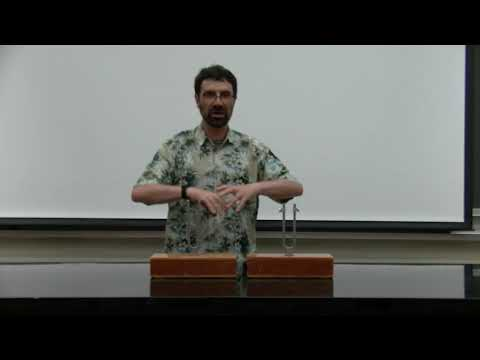

In [9]:
YouTubeVideo('CYnR0haH_Qc', width=560, height=315)

In fact, the signal doesn't appear or disappear.
The two constitutive oscillations are always present, but sometimes they interfere constructively (we hear a signal), and sometimes they interfere destructively (we don't hear anything).
The striking temporal pattern is entirely due to the closeness of the two frequencies.

Mathematically, the signal can be described as
$$f(t) = A\cos(\omega_1 t) + A\cos(\omega_2 t),$$
and we can precisely define the closeness of the frequencies when writing that
$$\with \delta\omega = \frac{\omega_2 - \omega_1}{2} \ll \hat \omega = \frac{\omega_1 + \omega_2}2.$$
(*never say that something is "small" or "large" without making explicit what you are comparing it to!*).
Using the trigonometric identity at stake here, we can write
$$f(t) = 2A\cos\left(\frac{\omega_1 t-\omega_2 t}2\right)\cos\left(\frac{\omega_1 t + \omega_2 t}2\right) = 2A\cos\left(\delta\omega t\right)\cos\left(\hat\omega t\right).$$
Because $\delta\omega \ll \hat\omega$, $\cos(\hat\omega t)$ oscillates much faster than $\cos(\delta\omega t)$.

To take the acoustic example above, 
* the sound we hear is at angular frequency $\hat\omega$. We call this the "carrier wave" because it carries the sound.
* The factor $2A\cos\left(\delta\omega t\right)$ is called the "envelope" of the signal, because it bounds the whole signal and determines whether an oscillation physically happens or not.
    The pattern of a signal appearing and disappearing happens at angular frequency $2\delta \omega$.
    Why the factor 2?
    Because one period of the envelope contains two signals amplification events, and we can't distinguish them by ear.
    So, the "beat frequency" is twice that of the envelope frequency.

It is easier to understand it by plotting it.

In [61]:
# import numpy as np
# import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(False)

def plot_beating(omega1, omega2):
    """ This function creates two oscillations, and plots each of them
    separately as well as a superposition of
    INPUT:
    omega1, omega2 are the two frequencies that superpose """
    ftsz = 11  # font size on plots
    lnwt = 1
    t_end = 60.

    t = np.linspace(0., t_end, 2048)  # time array
    f1 = np.cos(omega1*t)  # A = 1 implied
    f2 = np.cos(omega2*t)  # A = 1 implied
    ftot = f1 + f2  # total position

    domega = 0.5*(omega2 - omega1)  # delta omega
    omegabar = 0.5*(omega2 + omega1)  # average omega
    
    envelope = 2*np.cos(domega*t)

    # 1st plot: each mode individually
    plt.figure(figsize=(12, 4), dpi=100)
    plt.subplot(311)
    ax1 = plt.gca()
    #ax1.axvline(0., color='k')
    ax1.plot(t, f1, 'b', linewidth=lnwt)
    ax1.set_xlim([0., t_end])
    ax1.set_ylim([-1., 1.])
    ax1.set_ylabel('$\cos(\omega_1 t)$', fontsize=ftsz)
    ax1.grid()

    plt.subplot(312, sharex=ax1, sharey=ax1)
    ax2 = plt.gca()
    #ax2.axvline(0., color='k')
    ax2.plot(t, f2, 'y', linewidth=lnwt)
    ax2.set_ylabel('$\cos(\omega_2 t)$', fontsize=ftsz)
    ax2.grid()

    plt.subplot(313, sharex=ax1, sharey=ax1)
    ax3 = plt.gca()
    #ax2.axvline(0., color='k')
    ax3.plot(t, f1, 'b', linewidth=lnwt, label='$\cos(\omega_1 t)$')
    ax3.plot(t, f2, 'y', linewidth=lnwt, label='$\cos(\omega_2 t)$')
    ax3.set_ylabel('Both', fontsize=ftsz)
    ax3.set_xlabel('time [s]', fontsize=ftsz)
    ax3.legend(loc='center right')
    ax3.grid()

    # make these tick labels invisible
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    # plt.savefig('BeatingIndividual.png')
    # plt.close()

    # 2nd plot: adding the two, the beating phenomenon
    plt.figure(figsize=(12, 4), dpi=100)
    ax = plt.gca()
    ax.axvline(0., color='k')
    ax.plot(t, ftot, 'g', linewidth=lnwt, label='$f(t)$')
    ax.plot(t, envelope, 'r-.', label='$2\cos(\delta\omega t)$')
    ax.plot(t, -envelope, 'r--', label='$-2\cos(\delta\omega t)$')
    ax.set_ylim([-2.8, 3.2])
    ax.set_xlabel('time $t$ [s]', fontsize=ftsz)
    ax.set_ylabel('signal', fontsize=ftsz)
    ax.grid()
    ax.legend(loc='upper right')

    # annotation to highlight the envelope period
    T = 2*np.pi/domega
    ax.axvline(T/4, color='k', linestyle='-.')  # the t=T/2 mark
    ax.axvline(5*T/4, color='k', linestyle='-.')  # the t=3T/2 mark
    ax.annotate(text='', xy=(T/4, -2.4), xytext=(5*T/4, -2.4),
                arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax.text(1.5*np.pi/domega, -2.4, r'$2\pi/\delta\omega$',
            verticalalignment='center', horizontalalignment='center',
            backgroundcolor='w', fontsize=ftsz)

    # annotation to highlight the fast oscillation period
    T = 2.*np.pi/omegabar
    pp = 20.5
    t1 = pp*T
    t2 = (pp+1)*T
    ax.plot([t1]*2, [-np.cos(domega*t1), 2.6],
            color='k')  # the fast period mark #1
    ax.plot([t2]*2, [-np.cos(domega*t2), 2.6],
            color='k')  # the fast period mark #2
    ax.annotate(text='', xy=(t1-0.2, 2.2), xytext=(t2+0.2, 2.2),
                arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax.text((t1+t2)/2, 2.7, r'$2\pi/\bar\omega$',
            verticalalignment='center', horizontalalignment='center',
            backgroundcolor='w', fontsize=ftsz)

    # finishes
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    # plt.savefig('Beating.png')
    plt.show()
    # plt.close()

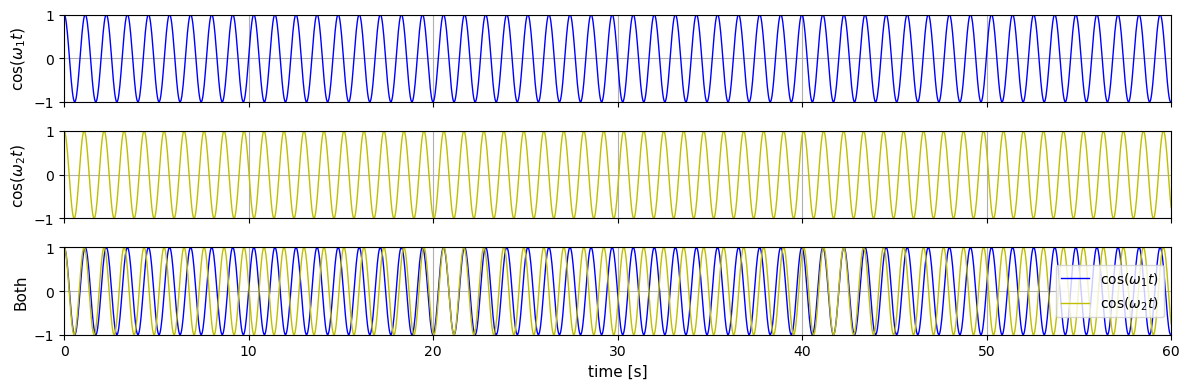

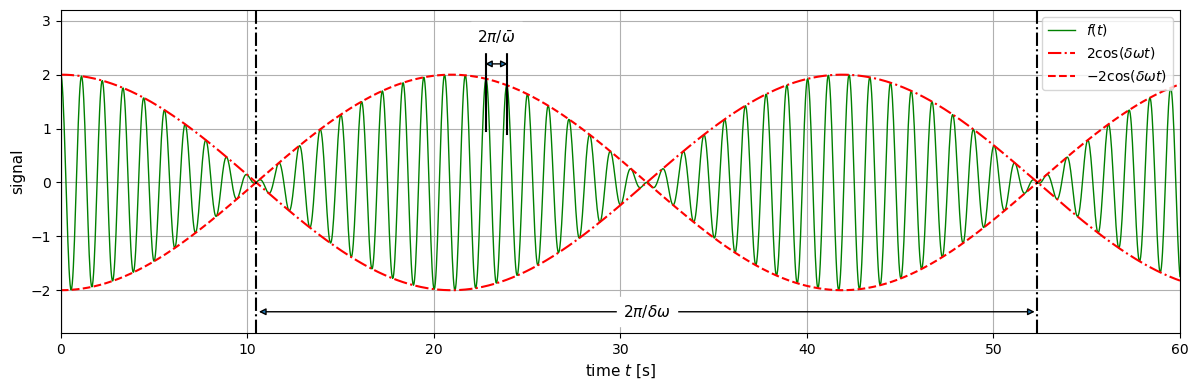

In [11]:
plot_beating(omega1=5.5, omega2=5.8)  # for pdf export

For those of you who have the courage to read these notes right off of the Jupyter notebook, the following commands will allow you to change the pattern above interactively.

In [62]:
from ipywidgets import interact, FloatSlider

In [13]:
interact(plot_beating, omega1=FloatSlider(min=4.5, max=5.5, step=.1, value=5.5), omega2=FloatSlider(min=5.6, max=7., step=.1, value=5.8))

interactive(children=(FloatSlider(value=5.5, description='omega1', max=5.5, min=4.5), FloatSlider(value=5.8, d…

<function __main__.plot_beating(omega1, omega2)>

# Summary

In this lecture, we saw:

* Basics of numerical integration of an ODE or a set of coupled ODEs, and how Taylor expansions can be a powerful tool to design numerical integration schemes.
* What periodic motions are, the definitions of the period, frequency, angular frequency, 
* Basic algebra of complex numbers: Cartesian vs. Polar representations, conjugation, four basic operations.
* How complex exponentials can represent an oscillation
* Phenomenon of beating

# Appendices

## Elementary algebra of complex numbers

We will list the basic properties of complex numbers you might find useful to know for the course:

1. Every complex number can be written in the form $z=x+iy$, where $i^2=-1$.
    * Example: Show that 
        \begin{equation}
        \text{Im}(z) = \text{Re}(-iz).\label{iequation}
        \end{equation}
        
        Answer: This follows because $z=x+iy$ and $-iz=y-ix$.
   
2. To add and multiply complex numbers, we use that if $z_1=x_1+iy_1$ and $z_2=x_2+iy_2$, then $$z=z_1+z_2=(x_1+x_2)+i(y_1+y_2)\andeq z_1z_2 = x_1x_2-y_1y_2+i(x_1y_2+x_2y_1)$$ and
    * Example: If $z_1 = 2 + 3i$, and $z_2 = 3-6i$, find $z_1 + z_2$ and $z_1\cdot z_2$.
        
        Answer: $z_1+z_2 = (2+3)+i(3-6)=5-3i,$  and $z_1\cdot z_2 = 2\cdot 3-3\cdot (-6)+i(2(-6)+3(3))=24-3i$.
    
3. *Equality* of two complex numbers $z_1$ and $z_2$ (as defined above) means equality of their real and imaginary parts:
    $$z_1=z_2\quad \Leftrightarrow \quad x_1=x_2,\ y_1=y_2.$$

4. The *complex conjugate* of $z$ is $z^*=x-iy$, and the magnitude of $z$ is $$|z|=\sqrt{zz^*}=\sqrt{x^2+y^2}.$$
    * Example: Find the complex conjugate and magnitude of $z=\sqrt2+3i$.
        
        Answer: $z^*=\sqrt 2 - 3i$, $|z|=\sqrt{2+9}=\sqrt{11}$.

5. The *polar form* of a complex number is related to polar coordinates in the Cartesian plane. You can use Taylor series expansion of $\sin\theta$, $\cos\theta$, and $e^{i\theta}$ to prove Euler's formula
    \begin{equation}
    \cos\theta+i\sin\theta = \eexp{i\theta},\label{demoivre}
    \end{equation}
    and remembering the formula will make your life oh so much easier.
    This lets us write $z$ in polar coordinates:
    \begin{align*}
    z & = x+iy = |z|\cos\theta + i |z|\sin\theta\\
      & = |z|(\cos\theta + i\sin\theta)\\
      & = |z|\eexp{i\theta} \mbox{ (from De Moivre's theorem)}\\
    \end{align*}
    The transformation into polar form is very useful in solving differential equations, as we'll learn, so we should get used to going back and forth between Cartesian and polar representations.
    * Example: Express $z=-i$ in polar form.
        
        Answer: First, remember $z=x+iy$ where $x=\mbox{Re}(z)$ and $y=\mbox{Im}(z)$,  In our case:
        $$x= 0 \quad\quad y=-1.$$
        Next, we have
        $$|z| = \sqrt{x^2+y^2} = \sqrt{0^2+(-1)^2}=1$$
        Note: using property 4 above, I could have also found the magnitude using:
        $$|z| = \sqrt{zz^*} = \sqrt{(-i)(i)}=\sqrt{-i^2}=\sqrt{-(-1)}=1.$$
        Finally, determine $\theta$ by using the fact that 
        $$\cos\theta = 0/1 = 1\andeq \sin\theta = -1/1 = -1,$$
        which corresponds to $\theta = -\pi/2$. Alternatively,
        $$\theta = \arctan(y/x) = \arctan(-1/0) = -\pi/2.$$

        Now plugging everything into polar coordinate form and using Euler's formula:
        \begin{equation}
        -i =(1)[ \cos(-\pi/2)+i\sin(-\pi/2)]=e^{-i\pi/2} \label{minusi}
        \end{equation}

    * Another example: Express $z=(5+6i)/(2+i)$ in Cartesian form and then in polar form.
    
        Answer: To put in standard Cartesian $x+iy$ form, we will need to multiply the numerator and denominator by the complex conjugate of the denominator (standard trick to get rid of all complex denominators):
        \begin{align*}
        z & = \frac{5+6i}{2+i} = \frac{5+6i}{2+i}\frac{2-i}{2-i} = \frac{(5+6i)(2-i)}{\sqrt{2^2 + 1^2}} = \frac{10+6+12i-5i}{5}\\
          & = \frac{16}{5}+i\frac 75\quad\mbox{(Cartesian)}\\
          & = \frac{\sqrt{16^2+7^2}}5e^{i\arctan(7/16)} \approx 3.49\eexp{0.412i} \quad\mbox{(Polar)}
        \end{align*}

## Manipulating complex numbers with Python

You can use Python to reduce complex numbers to Cartesian form, using the `complex` function that is a basic Python function (i.e., no need to load `numpy` or else), and where `complex(a, b)` corresponds to $a+ib$.
Here's how to do the Cartesian reduction numerically for the previous example.

In [14]:
z = complex(5, 6)/complex(2, 1)
print(z)

(3.2+1.4j)


Notice how Python writes the imaginary part, `1j` being the imaginary $i$ number and `1.4j` corresponding to $1.4i= 7i/5$.
Using $j$ instead of $i$ is frequent in other disciplines, especially in engineering.

Python can also give you the magnitude, real and imaginary parts of $z$, see below.

In [15]:
print('Real part of z is z.real =', z.real)
print('Imaginary part of z is z.imag =', z.imag)
print('Magnitude of z is abs(z) =', abs(z))

Real part of z is z.real = 3.2
Imaginary part of z is z.imag = 1.4
Magnitude of z is abs(z) = 3.492849839314596


For slightly more advanced operations, `numpy` has more, see below.

In [16]:
# import numpy as np  # if executing after kernel restart
print('Complex conjugate of z is np.conj(z) = ', np.conj(z))
print('Phase of z is np.angle(z) = ', np.angle(z))
print('Polar form of z is {0:.2f}*exp({1:.3f}j)'.format(abs(z), np.angle(z)))

Complex conjugate of z is np.conj(z) =  (3.2-1.4j)
Phase of z is np.angle(z) =  0.41241044159738727
Polar form of z is 3.49*exp(0.412j)


And finally, Python understands complex exponentials.

In [17]:
print('np.exp(complex(0, np.pi/4) = ', np.exp(complex(0, np.pi/4)))
print('np.exp(1j*pi/4) = ', np.exp(1j*np.pi/4))

np.exp(complex(0, np.pi/4) =  (0.7071067811865476+0.7071067811865475j)
np.exp(1j*pi/4) =  (0.7071067811865476+0.7071067811865475j)
